In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
optimum_pinned = {}
optimum = {}

best = pd.read_csv('data/find_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    threads = int(best_row['threads'])
    if pin:
        optimum_pinned[int(size)] = threads
    else:
        optimum[int(size)] = threads

def find_best(row):
    opt = optimum_pinned if row['pin'] else optimum
    return opt[min(opt.keys(), key=lambda k: abs(row['size']-k))]

print('w/ pinning:', optimum_pinned)
print('w/o pinning:', optimum)

w/ pinning: {500: 16, 750: 15, 1000: 16, 1250: 12, 1500: 12}
w/o pinning: {500: 16, 750: 16, 1000: 16, 1250: 8, 1500: 8}


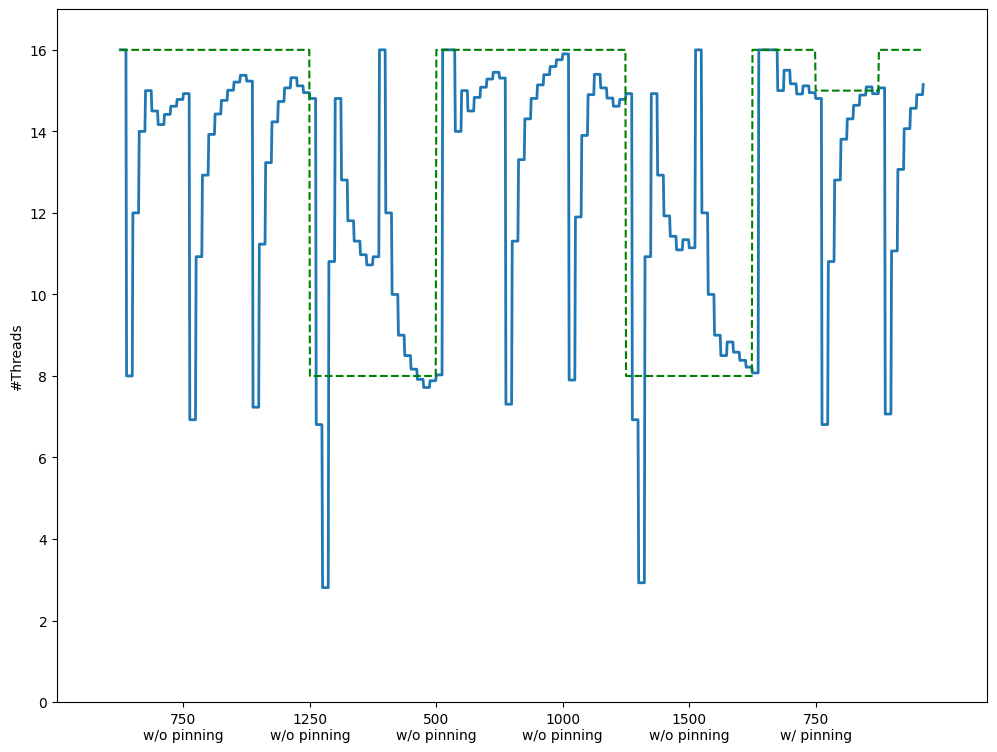

Average distance from optimum: 2.3983


In [21]:
fast = pd.read_csv('data/adapt_fast.csv')
fast['optimum'] = fast.apply(find_best, axis=1)

fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'], linewidth=2)
sns.lineplot(x=x, y=fast['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(100, len(fast), 200))
xlabels = [f'{fast['size'][x]}\n{'w/' if fast['pin'][x] else 'w/o'} pinning' for i, x in enumerate(xticks)]
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(fast)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_fast.png', bbox_inches='tight')
plt.show()

dist = (fast['threads'] - fast['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')

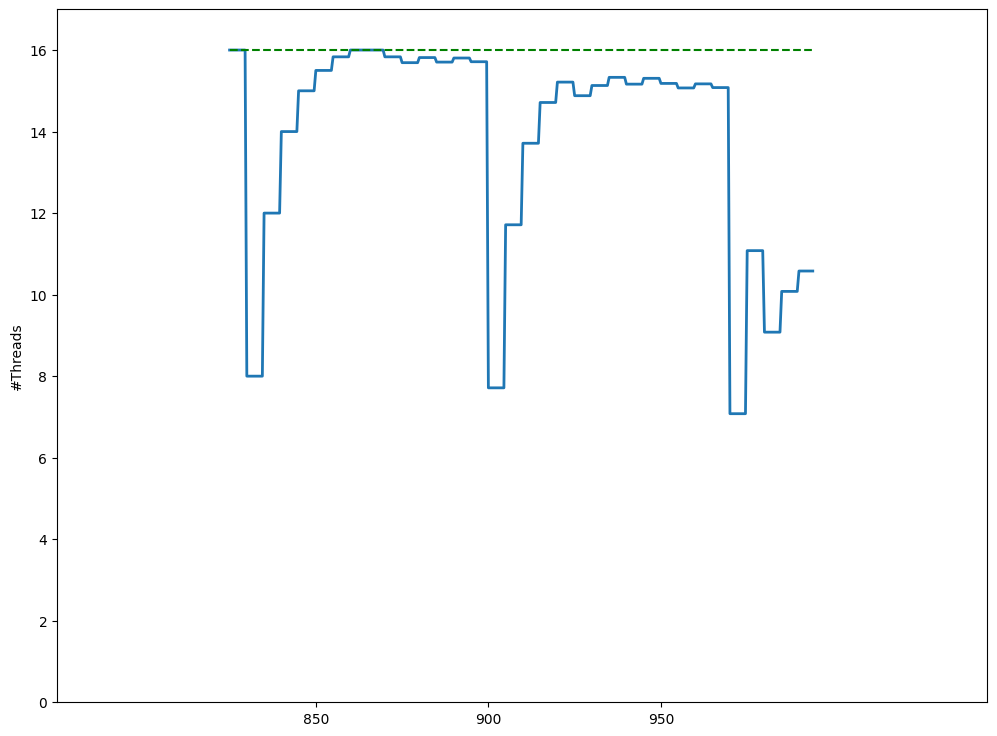

Average distance from optimum: 2.1619


In [20]:
slow = pd.read_csv('data/adapt_slow.csv')
slow['optimum'] = slow.apply(find_best, axis=1)

fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'], linewidth=2)
sns.lineplot(x=x, y=slow['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(50, len(slow), 100))
xlabels = [f'{'' if i % 2 == 0 else ''}{slow['size'][x]}' for i, x in enumerate(xticks)]
if len(xlabels) > 4:
    xlabels[4] += '\nThread pinning enabled'
if len(xlabels) > 14:
    xlabels[14] += '\nThread pinning disabled'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(slow)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_slow.png', bbox_inches='tight')
plt.show()

dist = (slow['threads'] - slow['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')